# Working with DNA sequence data for machine learning

## What is DNA Sequencing?
**DNA sequencing is a laboratory technique used to determine the exact sequence of bases (A, C, G, and T) in a DNA molecule.*DNA sequence information is important to scientists investigating the functions of genes*. The technology of DNA sequencing was made faster and less expensive as a part of the Human Genome Project.**

# What is Gene?

**Genes are a set of instructions that determine what the organism is like, its appearance, how it survives, and how it behaves in its environment.**

**A gene consists of a long combination of four different nucleotide bases, or chemicals. There are many possible combinations.**

**The four nucleotides are:**

**A (adenine)
C (cytosine)
G (guanine)
T (thymine)
Different combinations of the letters ACGT give people different characteristics. For example, a person with the combination ATCGTT may have blue eyes, while somebody with the combination ATCGCT may have brown eyes.**

# Project introduction
**In biological computing, working with DNA sequence data is common place. Becomming familiar with the Python package Biopython will really help you when dealing with biological sequence data in Python. DNA sequence data frequently are contained in a file format called "fasta" format.**
 ###  What is FASTA formate?
 
**In bioinformatics, FASTA format is a text-based format for representing  nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes [A,C,G,T,N] where A=Adenosine, C=Cytosine, G=Guanine, T=Thymidine and N= any of A,C,G,T. The format also allows for sequence names and comments to precede the sequences.**

**Example
#### >BTBSCRYR
tgcaccaaacatgtctaaagctggaaccaaaattactttctttgaagacaaaaactttca
aggccgccactatgacagcgattgcgactgtgcagatttccacatgtacctgagccgctg
caactccatcagagtggaaggaggcacctgggctgtgtatgaaaggcccaattttgctgg
gtacatgtacatcctaccccggggcgagtatcctgagtaccagcactggatgggcctcaa
cgaccgcctcagctcctgcagggctgttcacctgtctagtggaggccagtataagcttca
gatctttgagaaaggggattttaatggtcagatgcatgagaccacggaagactgcccttc
catcatggagcagttccacatgcgggaggtccactcctgtaaggtgctggagggcgcctg
gatcttctatgagctgcccaactaccgaggcaggcagtacctgctggacaagaaggagta
ccggaagcccgtcgactggggtgcagcttccccagctgtccagtctttccgccgcattgt
ggagtgatgatacagatgcggccaaacgctggctggccttgtcatccaaataagcattat
aaataaaacaattggcatgc

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

### Open the data for human and see what we have.

In [ ]:
human = pd.read_table('../input/dna-sequence-dataset/human.txt')
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


### We have some data for human DNA sequence coding regions and a class label. We also have data for Chimpanzee and a more divergent species, the dog. Let's get that.

In [ ]:
chimp = pd.read_table('../input/dna-sequence-dataset/chimpanzee.txt')
dog = pd.read_table('../input/dna-sequence-dataset/dog.txt')
chimp.head()
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [ ]:
human.shape


(4380, 2)

In [ ]:
human["sequence"][0]


'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [1]:
from IPython.display import Image
Image("/Users/drishtiseth/Desktop/dna.png")

# Treating DNA Sequence as a "Language" ,otherwise Known as K-Mer Counting

**In bioinformatics, k-mers are substrings of length k contained within a biological sequence. Primarily used within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides (i.e. A, T, G, and C), k-mers are capitalized upon to assemble DNA sequences,improve heterologous gene expression, identify species in metagenomic samples, and create attenuated vaccines.**

k-mers are simply length k subsequences. For example, all the possible k-mers of a DNA sequence are shown below:

   **k-mers for GTAGAGCTGT**
  


k-->k-mers


1-->G, T, A, G, A, G, C, T, G, T


2-->GT, TA, AG, GA, AG, GC, CT, TG, GT


3-->GTA, TAG, AGA, GAG, AGC, GCT, CTG, TGT


4-->GTAG, TAGA, AGAG, GAGC, AGCT, GCTG, CTGT


5-->GTAGA, TAGAG, AGAGC, GAGCT, AGCTG, GCTGT


6-->GTAGAG, TAGAGC, AGAGCT, GAGCTG, AGCTGT


7-->GTAGAGC, TAGAGCT, AGAGCTG, GAGCTGT


8-->GTAGAGCT, TAGAGCTG, AGAGCTGT


9-->GTAGAGCTG, TAGAGCTGT


10-->GTAGAGCTGT

## Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string.

In [ ]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

### Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.

In [ ]:
human["words"]=human.apply(lambda x: getKmers(x["sequence"]),axis=1)
human.head()
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp = chimp.drop('sequence', axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog = dog.drop('sequence', axis=1)

In [ ]:
human=human.drop("sequence",axis=1)
#human["words"][0]
human.head()


,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
#human["words"][2]


### Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. Let's do that now.

In [ ]:
human_texts=list(human["words"])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_h = human.iloc[:, 0].values  

In [ ]:
human_texts[2]

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [ ]:
y_h

array([4, 4, 3, ..., 6, 6, 6])

In [ ]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 0].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 0].values       

## Now let's review how to use sklearn's "Natural Language" Processing tools to convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary.

In [ ]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

## Let's see what we have... for human we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts.

In [ ]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


<AxesSubplot:>

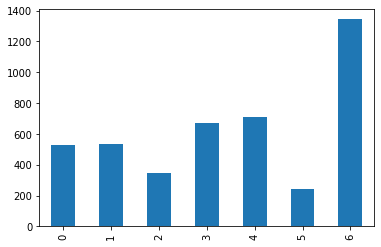

In [ ]:
human["class"].value_counts().sort_index().plot.bar()

<AxesSubplot:>

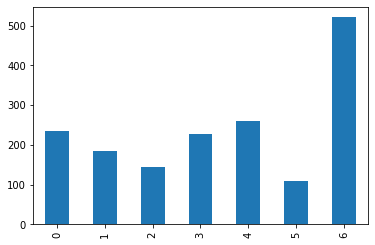

In [ ]:
chimp['class'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

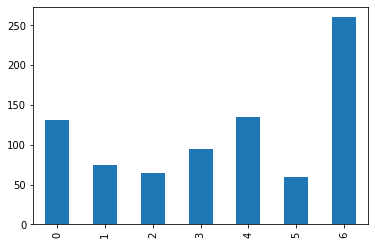

In [ ]:
dog['class'].value_counts().sort_index().plot.bar()

#### So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.

#### Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can really challenge the model's generalizability by trying to predict sequence function in other species (the chimpanzee and dog).

#### So below we will - 1: train/test spit. 2: Build simple multinomial naive Bayes classifier and 3: test the model performance.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y_h,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(3504, 232414)
(876, 232414)


In [ ]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

### Now let's make predictions on the human hold out test set and see how it performes on unseen data.

In [ ]:
y_pred = classifier.predict(x_test)

### Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### Make predictions for the Chimp and dog sequences¶

In [ ]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

### Now, let's examine the typical performace metrics for each species.

In [ ]:
# performance on chimp genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [ ]:
# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


**The model seems to perform well on human data. It also does on Chimpanzee. That might not be a surprize since the chimp and human are so similar genetically. The performance on dog is not quite as good. We would expect this since the dog is more divergent from human than the chimpanze.¶**